## 📌 Objective

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

## 🧰 Importing Libraries

# importing Libraries

## 🧰 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

## 🧪 Data Loading & Exploration

In [ ]:
df = pd.read_csv('/content/50_Startups (1).csv')

In [ ]:
len(df)

50

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

# Checking the data spread w.r.t. the individual Independent variable ['Marketing Spend'] and our target cum dependent variable['Profit']

## 📊 Visualizations

Text(0, 0.5, 'Profit')

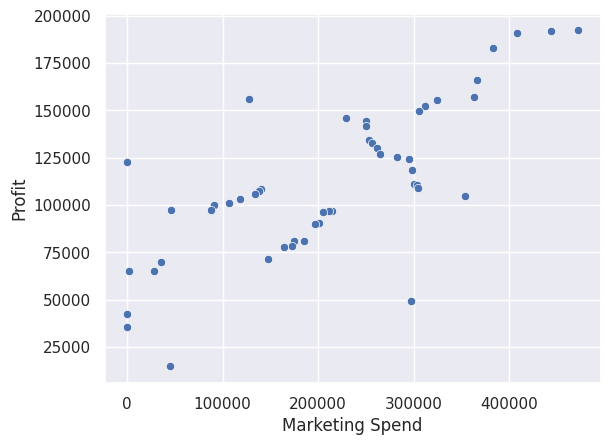

In [ ]:
sns.set_theme()
sns.scatterplot(x = 'Marketing Spend',y = 'Profit',data = df)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')


## 📊 Visualizations

Text(0, 0.5, 'Profit')

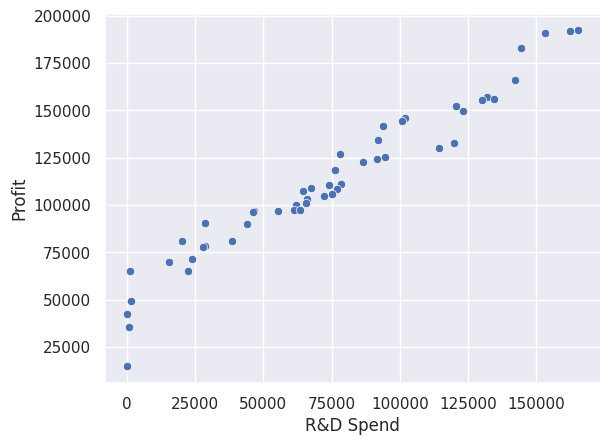

In [ ]:
sns.scatterplot(x = 'R&D Spend',y = 'Profit',data = df)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

## 📊 Visualizations

Text(0, 0.5, 'Profit')

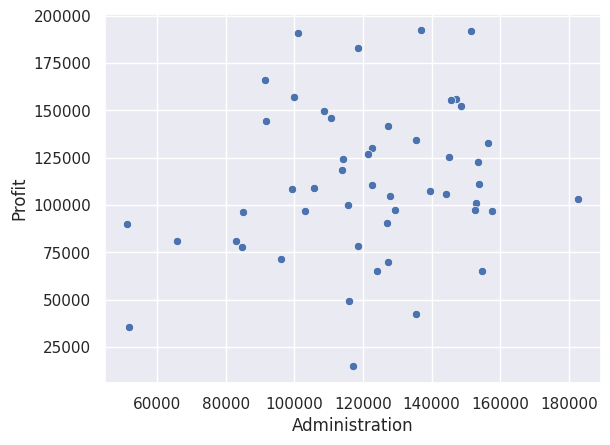

In [ ]:
sns.scatterplot(x = 'Administration',y = 'Profit',data = df)
plt.xlabel('Administration')
plt.ylabel('Profit')

| Feature             | Relationship with Profit | Suggestion                                |
| ------------------- | ------------------------ | ----------------------------------------- |
| **R\&D Spend**      | Strong Positive          | ✅ Invest more; high ROI                   |
| **Administration**  | Weak or None             | ❌ Might not affect Profit much            |
| **Marketing Spend** | Mild Positive            | ⚠️ Can help, but with diminishing returns |


for categorical values for chekcing the dependencie we use this method

## 📊 Visualizations

/tmp/ipython-input-19-3818035115.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'State',y='Profit',estimator="mean",data = df,ci = None)


Text(0, 0.5, 'Profit')

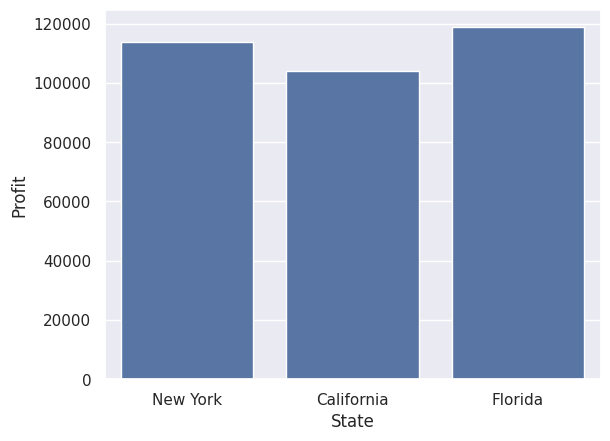

In [ ]:
sns.barplot(x = 'State',y='Profit',estimator="mean",data = df,ci = None)
plt.xlabel("State")
plt.ylabel("Profit")

In [ ]:
df.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


#You’ve created dummy variables (also called one-hot encoding) for each State.


In [ ]:
df['New York State'] = np.where(df['State'] == 'New York',1,0)
df['California State'] = np.where(df['State'] == 'California',1,0)
df['Florida State'] = np.where(df['State'] == 'Florida',1,0)



In [ ]:
df.drop(columns = 'State',axis =1,inplace = True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


# Create a list of independent variables

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'New York State', 'California State', 'Florida State'],
      dtype='object')

In [ ]:
dependent_variable = 'Profit'
independent_variable = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variable

['Florida State',
 'R&D Spend',
 'Marketing Spend',
 'Administration',
 'New York State',
 'California State']

In [ ]:
x = df[independent_variable].values
y = df[dependent_variable].values

In [ ]:
x.shape,y.shape

((50, 6), (50,))

## ✂️ Splitting the Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=19)

In [ ]:
x_train.shape,y_test.shape

((40, 6), (10,))

## 🧰 Importing Libraries

Why do we use MinMaxScaler?
MinMaxScaler scales your features to a range between 0 and 1.

This is especially important when your dataset contains features with different scales (e.g., R&D Spend in lakhs vs State dummy variables in 0/1).

## 🧰 Importing Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(x_train)
X_test = Scaler.transform(x_test)

In [ ]:
X_train[:10]

array([[0.        , 0.55635219, 0.53555202, 0.59596018, 0.        ,
        1.        ],
       [1.        , 0.17335288, 0.42631115, 0.52364628, 0.        ,
        0.        ],
       [1.        , 0.72539353, 0.54370828, 0.77636101, 0.        ,
        0.        ],
       [0.        , 0.98335946, 0.94089337, 0.73205994, 0.        ,
        1.        ],
       [1.        , 0.56766982, 0.52956308, 0.52590999, 0.        ,
        0.        ],
       [0.        , 0.81412828, 0.27071031, 0.69625184, 0.        ,
        1.        ],
       [0.        , 0.        , 0.09574943, 0.43733425, 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , 0.60798038, 1.        ,
        0.        ],
       [0.        , 0.0060492 , 0.0040356 , 0.49876857, 1.        ,
        0.        ],
       [0.        , 0.43609283, 0.74861321, 0.53057307, 1.        ,
        0.        ]])

## 🧠 Model Building

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

we need thr predicted output to test our perfomance

In [ ]:
y_predict = regressor.predict(X_train)

# checking for the perfomance or errors of the model

## 📈 Model Evaluation

In [ ]:
mae = mean_squared_error(y_train,y_predict)
mse = mean_squared_error(y_train,y_predict)
r2 = r2_score(y_train,y_predict)
print("mean absolute error",mae)
print("mean squared error", mse)
print("r2 score", r2)

mean absolute error 86654640.52897406
mean squared error 86654640.52897406
r2 score 0.9506263281872591


#now we will check the test data prediction how much is correct

In [ ]:
y_test_predict = regressor.predict(X_test)

## 📈 Model Evaluation

In [ ]:
r2_test = r2_score(y_test,y_test_predict)
print(r2_test)

0.9061336843878222


# **Multiple Linear Regression**
***uses all selected input features to model and predict the output — but it doesn't automatically decide which features are useful.***

* To check which variables affect the output:

* Look at p-values (in statsmodels)

* Look at coefficients

* Use feature selection techniques




| Type                           | Description                                                      |
| ------------------------------ | ---------------------------------------------------------------- |
| **Simple Linear Regression**   | Predicts the target using **just one independent variable**.     |
| **Multiple Linear Regression** | Predicts the target using **two or more independent variables**. |



## ✅ Conclusion

- The model suggests that **R&D Spend** is the most impactful factor in determining startup profit.
- Other features like Administration and Marketing Spend had lesser statistical significance.
- Backward elimination refined the model by removing insignificant predictors.
